In [544]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [545]:
def mulM(A,B,type=np.float64):

    if len(np.shape(A)) == 1:
        A = np.reshape(A,(1,len(A)))

    if len(np.shape(B)) == 1:
        B = np.reshape(B,(len(B),1))

    AB = np.zeros(shape=(np.shape(A)[0],np.shape(B)[1]),dtype=type)

    if np.shape(A)[1] == np.shape(B)[0]:
        for i in range(np.shape(B)[1]):
            for j in range(np.shape(A)[0]):
                suma = 0
                for k in range(np.shape(A)[1]):
                    suma += A[j][k]*B[k][i]  
                AB[j][i] = suma
    else:
        AB = None
        print('Multiplicación no está definida')
    
    return AB

# Problema de Cayley y los fractales 1879

a)

In [546]:
x , y = sym.symbols('x y', real=True)
x,y

(x, y)

b)

In [547]:
z = x + sym.I*y
z

x + I*y

c)

In [548]:
f = z**3 - 1
sym.expand_complex(f)

x**3 - 3*x*y**2 + I*(3*x**2*y - y**3) - 1

d)

In [549]:
F = sym.Matrix([sym.re(f),sym.im(f)])
F

Matrix([
[x**3 - 3*x*y**2 - 1],
[    3*x**2*y - y**3]])

e)

In [550]:
J = F.jacobian(sym.Matrix([x,y]))
J

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

f)

In [551]:
Fn = sym.lambdify([x,y],F,'numpy')
Jn = sym.lambdify([x,y],J,'numpy')

g)

In [552]:
def NewtonRaphson(z0,Fn,Jn,itmax=1000,error=1e-7):
    
    it = 0
    d = 1.
    
    while d > error and it < itmax:
        
        # Vector actual
        rc = z0

        InvJ = np.linalg.inv(Jn(rc[0],rc[1]))
        
        z0 = rc - np.reshape(mulM(InvJ,Fn(rc[0],rc[1])),-1)
        
        d = np.max(np.abs(z0 - rc))
        
        it += 1
    
    return np.round(z0,7)

h)

In [553]:
z0 = np.array([0.5,0.5])
z = NewtonRaphson(z0,Fn,Jn)
z

array([-0.5      ,  0.8660254])

i)

In [554]:
N = 300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

j)

In [555]:
Fractal = np.zeros((N,N), np.int64)

for i in range(N):
    for j in range(N):
        r = np.array([x[i],y[j]])
        if np.array_equiv(NewtonRaphson(r,Fn,Jn),np.array([-0.5,round(np.sqrt(3)/2,7)])):
            Fractal[i][j] = 20
        elif np.array_equiv(NewtonRaphson(r,Fn,Jn),np.array([-0.5,-1*round(np.sqrt(3)/2,7)])):
            Fractal[i][j] = 100
        elif np.array_equiv(NewtonRaphson(r,Fn,Jn),np.array([1.,0.])):
            Fractal[i][j] = 255
        else:
            None    
Fractal

array([[100, 100, 100, ...,  20,  20,  20],
       [100, 100, 100, ...,  20,  20,  20],
       [100, 100, 100, ...,  20,  20,  20],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int64)

k)

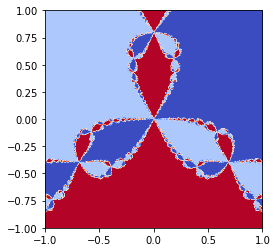

In [556]:
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])